In [1]:
from fastai.vision import *
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy

In [19]:
path = './faces/'
mask_datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=100),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.3),
    batch_tfms=aug_transforms(mult=2)
)
dls = mask_datablock.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [23]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy,error_rate])

In [24]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,4.290821,4.608027,0.042254,0.957747,00:48


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,3.862660,3.476317,0.070423,0.929577,01:00
1,3.704582,3.096278,0.042254,0.957747,01:02
2,3.598777,2.989504,0.112676,0.887324,00:58
3,3.449361,3.009352,0.154930,0.845070,00:57
4,3.212466,2.917670,0.154930,0.845070,00:59
5,3.036050,2.800692,0.154930,0.845070,01:00
6,2.867224,2.745881,0.140845,0.859155,01:01
7,2.729955,2.677670,0.183099,0.816901,00:59
8,2.622658,2.664849,0.225352,0.774648,01:01
9,2.507380,2.655805,0.225352,0.774648,00:58


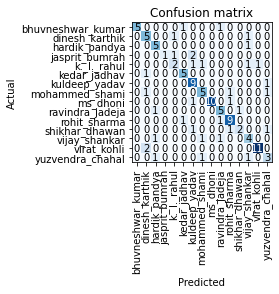

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

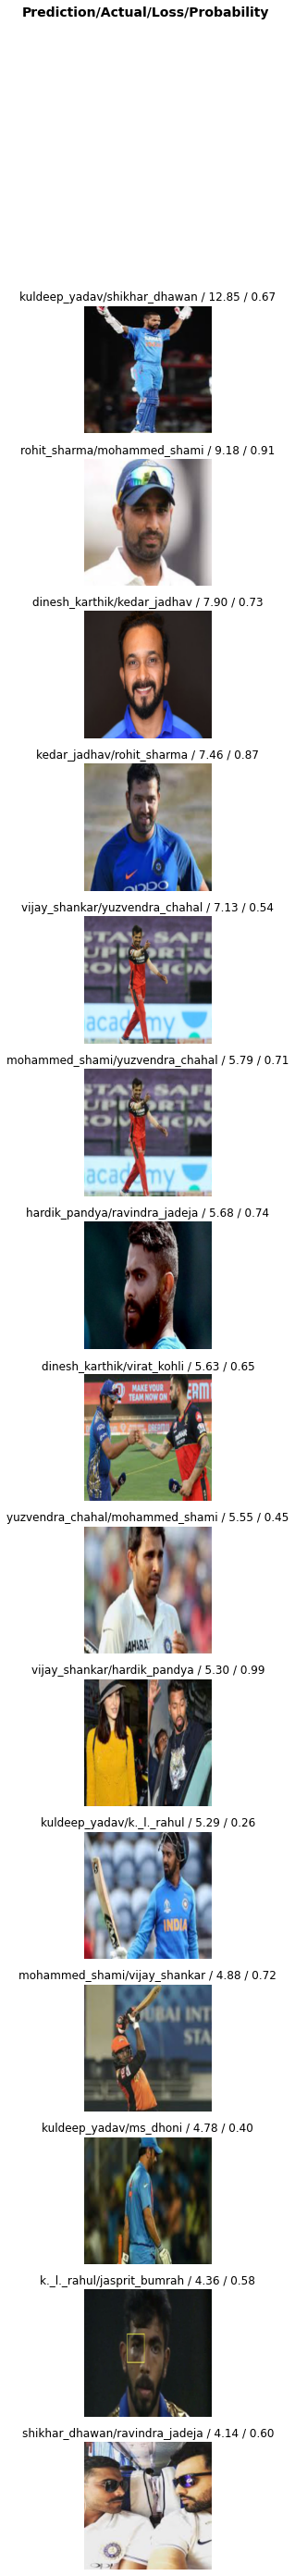

In [8]:
interp.plot_top_losses(15, nrows=15)

In [11]:
learn.export()